In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
warnings.filterwarnings("ignore")
from statsmodels.graphics.api import qqplot




In [2]:
df_user_balance_table = pd.read_csv('H:/pythonchengx_u/Mayijinfu_Purchase_Redemption/Purchase Redemption Data/user_balance_table.csv')


In [3]:
df_user_balance_table.head()


,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [4]:
df_tmp = df_user_balance_table.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
df_tmp.reset_index(inplace=True)



In [5]:
#将“20130701”形式的日期处理成“2013-07-01”格式
for i in range(len(df_tmp['report_date'])):
    df_tmp['report_date'][i] = str(df_tmp['report_date'][i])[0:4]+'-'+str(df_tmp['report_date'][i])[4:6]+'-'+str(df_tmp['report_date'][i])[6:8]

In [6]:
df_tmp.head()


,report_date,total_purchase_amt,total_redeem_amt
0,2013-07-01,32488348,5525022
1,2013-07-02,29037390,2554548
2,2013-07-03,27270770,5953867
3,2013-07-04,18321185,6410729
4,2013-07-05,11648749,2763587


In [7]:
comp_predict_table=pd.read_csv("H:/pythonchengx_u/Mayijinfu_Purchase_Redemption/Purchase Redemption Data/comp_predict_table.csv")

In [8]:
comp_predict_table.head()

,report_date
0,20140901
1,20140902
2,20140903
3,20140904
4,20140905


In [9]:
for i in range(len(comp_predict_table['report_date'])):
    comp_predict_table['report_date'][i] = str(comp_predict_table['report_date'][i])[0:4]+'-'+str(comp_predict_table['report_date'][i])[4:6]+'-'+str(comp_predict_table['report_date'][i])[6:8]


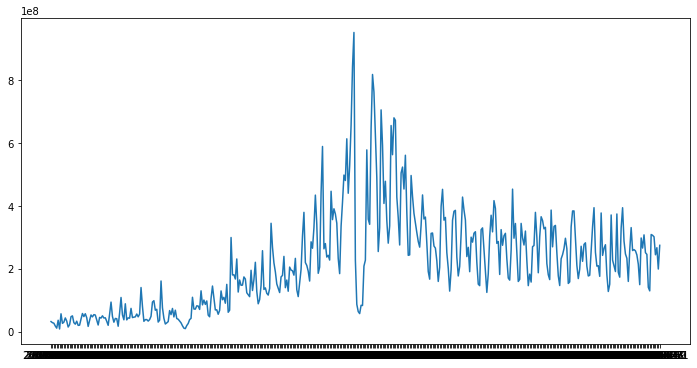

In [10]:
#绘制2013-07-01~2014-08-30期间的时间序列的时序图
Fig = plt.figure(figsize=(12,6))
plt.plot(df_tmp['report_date'],df_tmp['total_purchase_amt'])
plt.show()


In [80]:
#尝试利用2014-06-01~2014-07-30之间的数据建模，预测2014-08-01~2014-08-30
data_67 = df_tmp[335:396]#六月和七月
data_8 = df_tmp[396:426]#八月

In [11]:
data_year=df_tmp

In [13]:
data_67.reset_index(inplace=True)
del data_67['index']

In [14]:
data_8.reset_index(inplace=True)
del data_8['index']

In [12]:
data_year.reset_index(inplace=True)
del data_year['index']

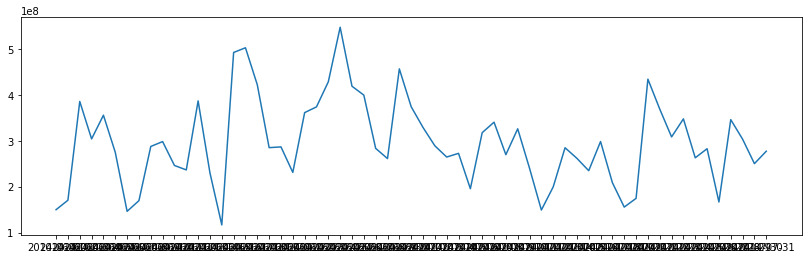

In [16]:
Fig = plt.figure(figsize=(14,4))
plt.plot(data_67['report_date'],data_67['total_redeem_amt'])
plt.show()

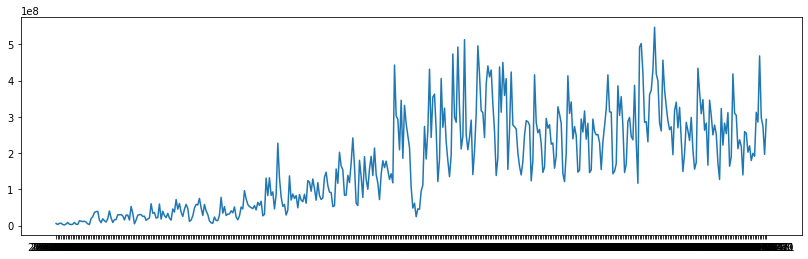

In [17]:
Fig = plt.figure(figsize=(14,4))
plt.plot(data_year['report_date'],data_year['total_redeem_amt'])
plt.show()

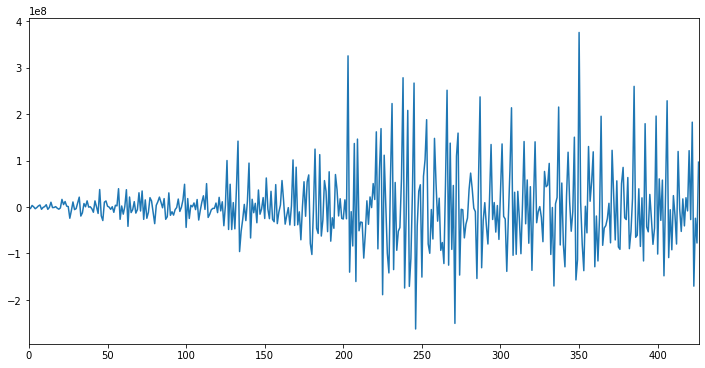

In [13]:
data_year_diff1 = data_year['total_redeem_amt'].diff(1)
data_year_diff1.plot(figsize=(12,6))

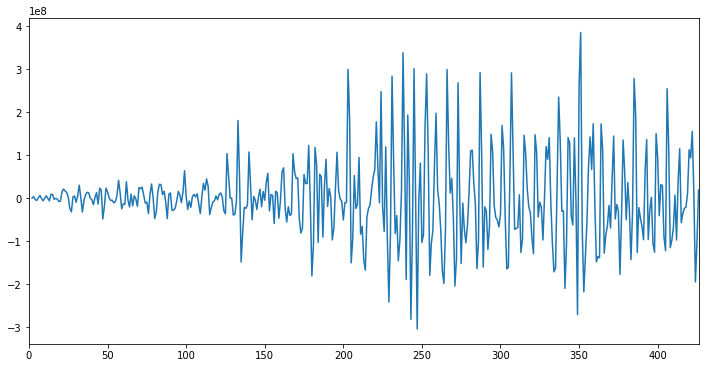

In [52]:
data_year_diff2 = data_year['total_redeem_amt'].diff(2)
data_year_diff2.plot(figsize=(12,6))


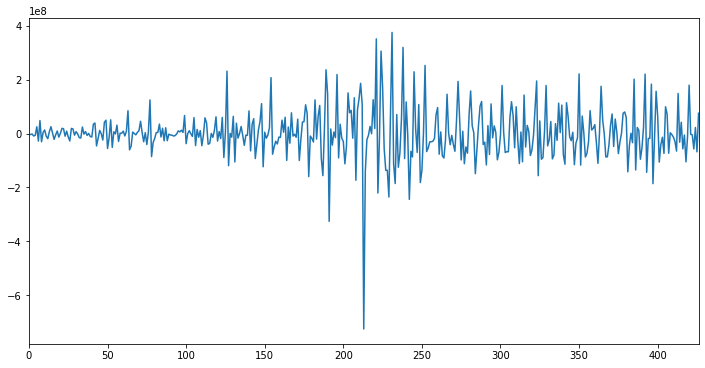

In [53]:
data_year_diff_purchase1 = data_year['total_purchase_amt'].diff(1)
data_year_diff_purchase1.plot(figsize=(12,6))



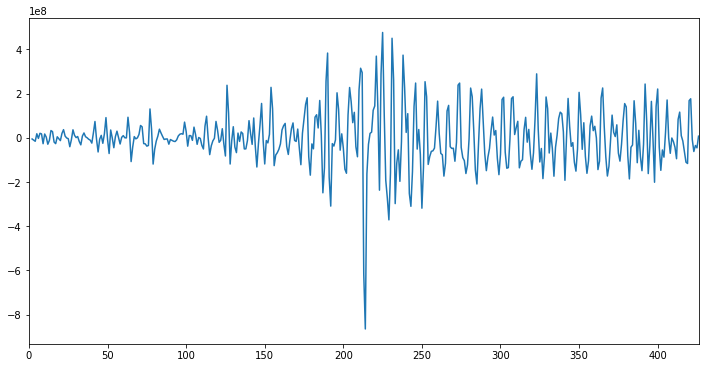

In [54]:
data_year_diff_purchase2 = data_year['total_purchase_amt'].diff(2)
data_year_diff_purchase2.plot(figsize=(12,6))




In [18]:
#观看时序图，感觉该时间序列满足宽平稳的要求（任意时刻的1阶距和2阶距相等）

#分析该时间序列是否能通过平稳性检验和白噪检验

In [19]:
#检验6~7月时间序列的平稳性
t = adfuller(data_67['total_redeem_amt'])
print(t[1])

7.45365800619309e-06


In [20]:
#白噪检验（纯随机性检验）
qljungbox, pval, qboxpierce, pvalbp = acorr_ljungbox((data_67['total_redeem_amt']), lags=12,boxpierce=True)

#jungbox检验
print(pval)

#boxpierce检验
print(pvalbp)


[0.00245205 0.01017171 0.02698995 0.05674615 0.08997177 0.05749504
 0.00151967 0.00082257 0.00142255 0.00125433 0.0011119  0.00161359]
[0.00311462 0.01265555 0.03291317 0.06785262 0.10721708 0.07701018
 0.00394091 0.00258201 0.00435065 0.00430252 0.00430017 0.00622   ]


#依据p-value可知6~7月时间序列通过了以上两种检验。下面分析自相关系数和偏自相关系数

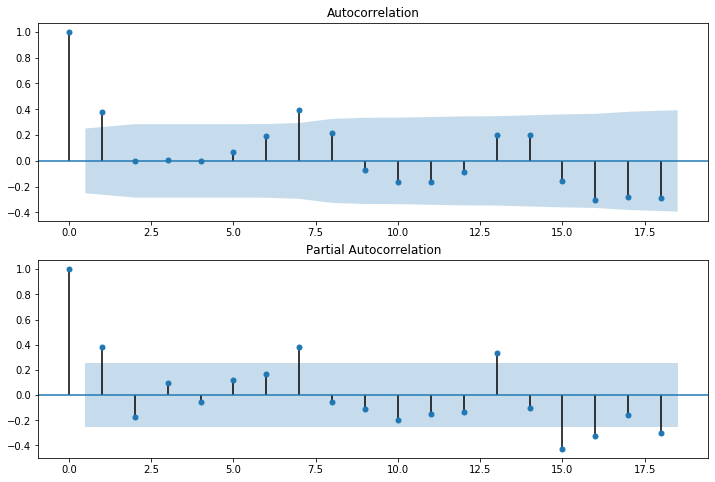

In [21]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_67['total_redeem_amt'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_67['total_redeem_amt'],ax=ax2)

#观察上面两图，可知t时刻与t+1时刻存在相关性，也与t+7时刻存在相关性。下面先粗糙的将ARIMA模型中的p定为1，也将q定为1

In [22]:
data_67['total_redeem_amt_f'] = data_67['total_redeem_amt'].astype(float)
data_67['total_redeem_amt_f'].index = data_67['report_date']
data_67['total_redeem_amt_f'].head()

report_date
2014-06-01    149829253.0
2014-06-02    170409506.0
2014-06-03    385622582.0
2014-06-04    303978838.0
2014-06-05    355645445.0
Name: total_redeem_amt_f, dtype: float64

In [19]:
data_year['total_redeem_amt_f'] = data_year['total_redeem_amt'].astype(float)
data_year['total_redeem_amt_f'].index = data_year['report_date']
data_year['total_redeem_amt_f'].head()




report_date
2013-07-01    5525022.0
2013-07-02    2554548.0
2013-07-03    5953867.0
2013-07-04    6410729.0
2013-07-05    2763587.0
Name: total_redeem_amt_f, dtype: float64

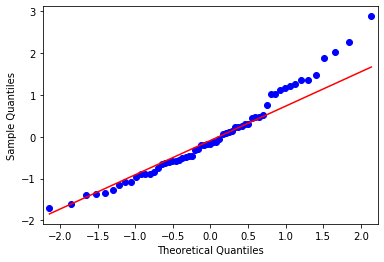

In [24]:
model = ARIMA(data_67['total_redeem_amt_f'], order=(1,0,1)).fit()
resid_67 = model.resid#残差
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
fig = qqplot(resid_67, line='q', ax=ax, fit=True)



855300335.3009


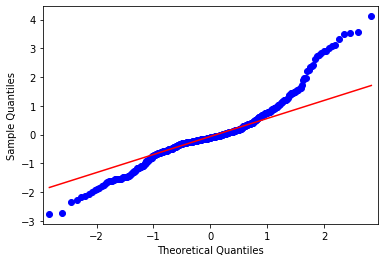

In [35]:
model = ARIMA(data_year['total_redeem_amt_f'], order=(1,0,1)).fit()
resid_year101 = model.resid#残差
print(resid_year101.sum())
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
fig = qqplot(resid_year101, line='q', ax=ax, fit=True)

1395282057.188127


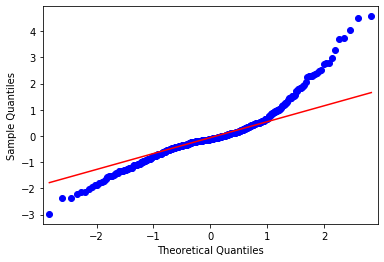

In [104]:
model701 = ARIMA(data_year['total_redeem_amt_f'], order=(7,0,1)).fit()
resid_year701 = model.resid#残差
print(resid_year701.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year701, line='q', ax=ax, fit=True)




30544637.406362116


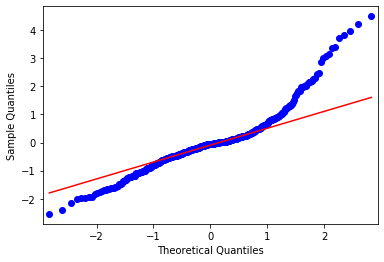

In [85]:
model711 = ARIMA(data_year['total_redeem_amt_f'], order=(7,1,1)).fit()
resid_year711 = model711.resid#残差
print(resid_year711.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year711, line='q', ax=ax, fit=True)

In [86]:
predict_sunspots711 = model711.predict('2014-09-01', '2014-09-30', dynamic=True)

predict_sunspots711.to_csv("predict_sunspots711.csv")

12148466.80600059


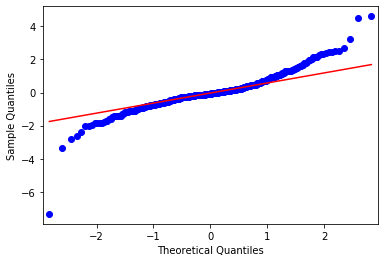

In [91]:
model_purchase0711 = ARIMA(data_year['total_purchase_amt'], order=(7,1,1)).fit()
resid_year_purchase0711 = model_purchase0711.resid#残差
print(resid_year_purchase0711.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year_purchase0711, line='q', ax=ax, fit=True)




-4112439557.3584065


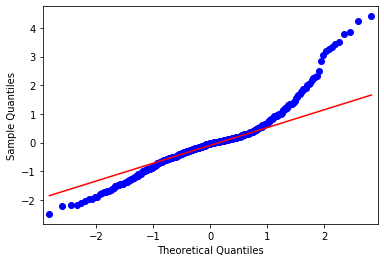

In [56]:
model721 = ARIMA(data_year['total_redeem_amt_f'], order=(7,2,1)).fit()
resid_year721 = model721.resid#残差
print(resid_year721.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year721, line='q', ax=ax, fit=True)


1062925850.9810851


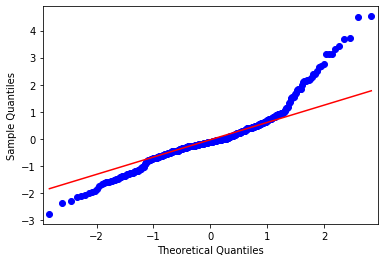

In [37]:
model = ARIMA(data_year['total_redeem_amt_f'], order=(14,0,1)).fit()
resid_year1401 = model.resid#残差
print(resid_year1401.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year1401, line='q', ax=ax, fit=True)



1395282057.188127


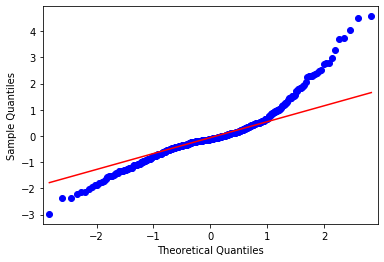

In [44]:
model = ARIMA(data_year['total_redeem_amt_f'], order=(35,0,1)).fit()
resid_year1407 = model.resid#残差
print(resid_year1407.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year1407, line='q', ax=ax, fit=True)

1347873203.8844771


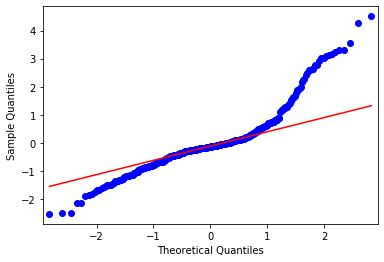

In [38]:
model = ARIMA(data_year['total_redeem_amt_f'], order=(1,0,7)).fit()
resid_year107 = model.resid#残差
print(resid_year107.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year107, line='q', ax=ax, fit=True)


1347873203.8844771


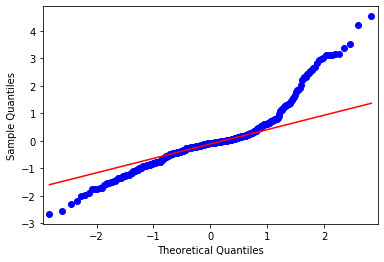

In [40]:
model = ARIMA(data_year['total_redeem_amt_f'], order=(1,1,7)).fit()
resid_year117 = model.resid#残差
print(resid_year107.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year117, line='q', ax=ax, fit=True)

1347873203.8844771


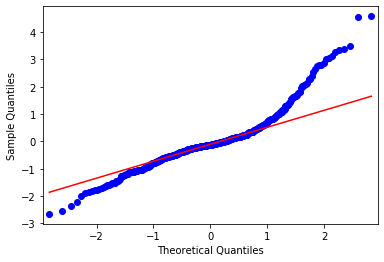

In [39]:
model = ARIMA(data_year['total_redeem_amt_f'], order=(1,0,14)).fit()
resid_year1014 = model.resid#残差
print(resid_year107.sum())
fig_year = plt.figure(figsize=(6,4))
ax = fig_year.add_subplot(111)
fig_year = qqplot(resid_year1014, line='q', ax=ax, fit=True)


In [ ]:
#上面使用ARIMA模型对2014-06-01~2014-07-30之间的数据建模，并采用QQ-plot分析了拟合效果。看起来残差符合正态分布。

In [ ]:
#下面对残差做具体分析，可知的确符合正态分布

In [ ]:
residuals = pd.DataFrame(resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

检查残差是否自相关

In [ ]:
#DW检验
print(sm.stats.durbin_watson(model.resid.values))

下面检查残差是否为白噪

In [ ]:
qljungbox, pval, qboxpierce, pvalbp=acorr_ljungbox(resid, lags=12,boxpierce=True)
print(pval)
print(pvalbp)


上述分析表明残差是白噪


使用ARIMA模型预测2014年8月的数据

In [ ]:
predict_sunspots = model.predict('2014-08-01', '2014-08-30', dynamic=True)

In [45]:
predict_sunspots3501 = model.predict('2014-09-01', '2014-09-30', dynamic=True)

In [ ]:
predict_redeem= predict_sunspots

In [46]:
predict_sunspots3501.head()

2014-09-01    3.489824e+08
2014-09-02    2.799698e+08
2014-09-03    2.863736e+08
2014-09-04    2.657022e+08
2014-09-05    2.472832e+08
Freq: D, dtype: float64

In [47]:
predict_sunspots3501.to_csv("mayi_ARIMA3501.csv")

In [98]:
model_purchase0711_pre = model_purchase0711.predict('2014-09-01', '2014-09-30', dynamic=True)

model_purchase0711_pre.to_csv("model_purchase711_pre02.csv")



In [ ]:
data_year['total_purchase_amt'] = data_year['total_purchase_amt'].astype(float)
data_year['total_purchase_amt'].index = data_year['report_date']
data_year['total_purchase_amt'].head()


In [ ]:
model_pur_101 = ARIMA(data_year['total_purchase_amt'], order=(1,0,1)).fit()
resid_year_pur_101 = model_pur_101.resid#残差
print(resid_year_pur_101.sum())
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
fig = qqplot(resid_year_pur_101, line='q', ax=ax, fit=True)


In [ ]:
sum(abs(np.array(list(predict_redeem)) - data_8['total_redeem_amt'])/data_8['total_redeem_amt'])

In [ ]:
predict_redeem.head()



In [ ]:
predict_redeem.to_csv("mayi_ARIMA.csv")
